# Iris Dataset Classification - TASK #01

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Information about data

In [2]:
df = pd.read_csv("./Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,31,4.8,3.1,1.6,0.2,Iris-setosa
104,105,6.5,3.0,5.8,2.2,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


Here we have 
`Id`, `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`, `Species` columns

There are three categories in `Species` column i.e **Iris-setosa**, **Iris-versicolor**, **Iris-virginica**

In [6]:
# basic stats about data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking outliers

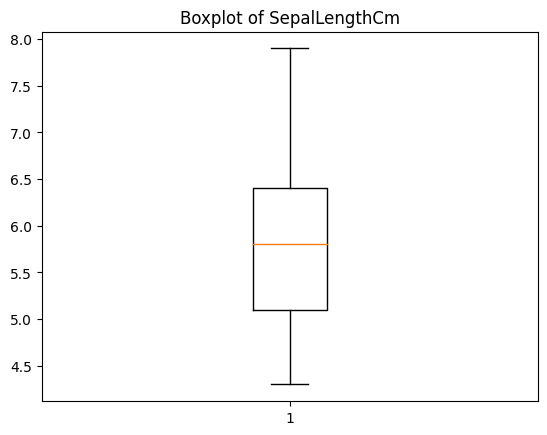

In [8]:
plt.boxplot(df['SepalLengthCm'])

plt.title("Boxplot of SepalLengthCm");

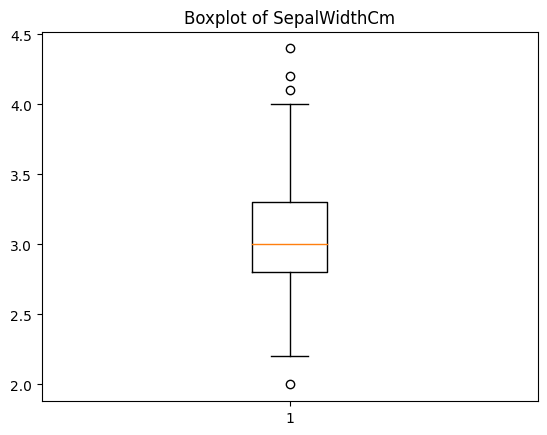

In [9]:
plt.boxplot(df['SepalWidthCm'])

plt.title("Boxplot of SepalWidthCm");

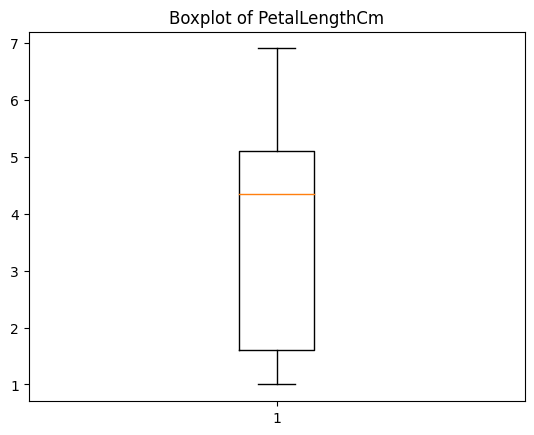

In [10]:
plt.boxplot(df['PetalLengthCm'])

plt.title("Boxplot of PetalLengthCm");

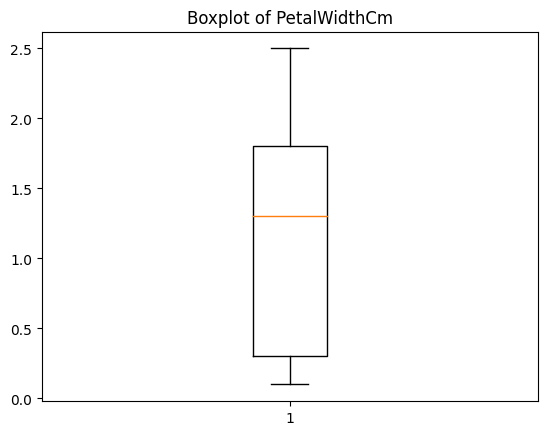

In [11]:
plt.boxplot(df['PetalWidthCm'])

plt.title("Boxplot of PetalWidthCm");

### Data Preporcessing

In [12]:
# checking for null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
# checking duplicate row
df.duplicated().sum()

0

In [14]:
# dropping `Id` column
df.drop(columns=['Id'],inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Applying feature engineering on `Species` column
spe={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
df['Species']=[spe[i] for i in df['Species']]

df.sample(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
28,5.2,3.4,1.4,0.2,1
7,5.0,3.4,1.5,0.2,1
117,7.7,3.8,6.7,2.2,3
44,5.1,3.8,1.9,0.4,1
93,5.0,2.3,3.3,1.0,2


In [16]:
# Changing `Species` column datatype
df['Species'] = df['Species'].astype('int8')

### Splitting data into train and test

In [17]:
X = df.drop(columns=['Species'])
y = df['Species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Training Model

In [19]:
# creating model class
model = LogisticRegression(max_iter=500)

In [20]:
# fitting data info model
model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [21]:
model.score(X_train,y_train)

0.9809523809523809

In [22]:
# prediction
y_pred = model.predict(X_test)

In [23]:
# checking accuracy score
accuracy_score(y_test,y_pred)

0.9777777777777777

According to score our model is perfoming preety good :)